<a href="https://colab.research.google.com/github/Elian19-01/Massive-data/blob/main/inflacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DatasetReference('big-data-class2022', 'inflation')
  Country TIME_Code      Value
0  Mexico      1969  13.826840
1  Mexico      1969   0.013455
2  Mexico      1969  -8.682017
3  Mexico      1969   0.013226
4  Mexico      1969   0.013455
Index(['Country', 'TIME_Code', 'Value'], dtype='object')
(467076, 3)
               Value
TIME_Code           
1969        1.292876
1970        2.598853
1971        2.486839
1972        2.256358
1973        6.932142
1974       13.672695
1975        6.861246
1976        7.009060
1977       14.514778
1978        8.503617
1979        9.226047
1980       12.568000
1981       11.999419
1982       35.207171
1983       57.742221
1984       32.860256
1985       28.676387
1986       46.072367
1987       65.649257
1988       59.669403
1989       11.555485
1990       17.083855
1991       17.104795
1992       15.291115
1993       11.566156
1994       11.077871
1995       28.875340
1996       31.471624
1997       26.872035
1998       26.890621
1999       30.666674


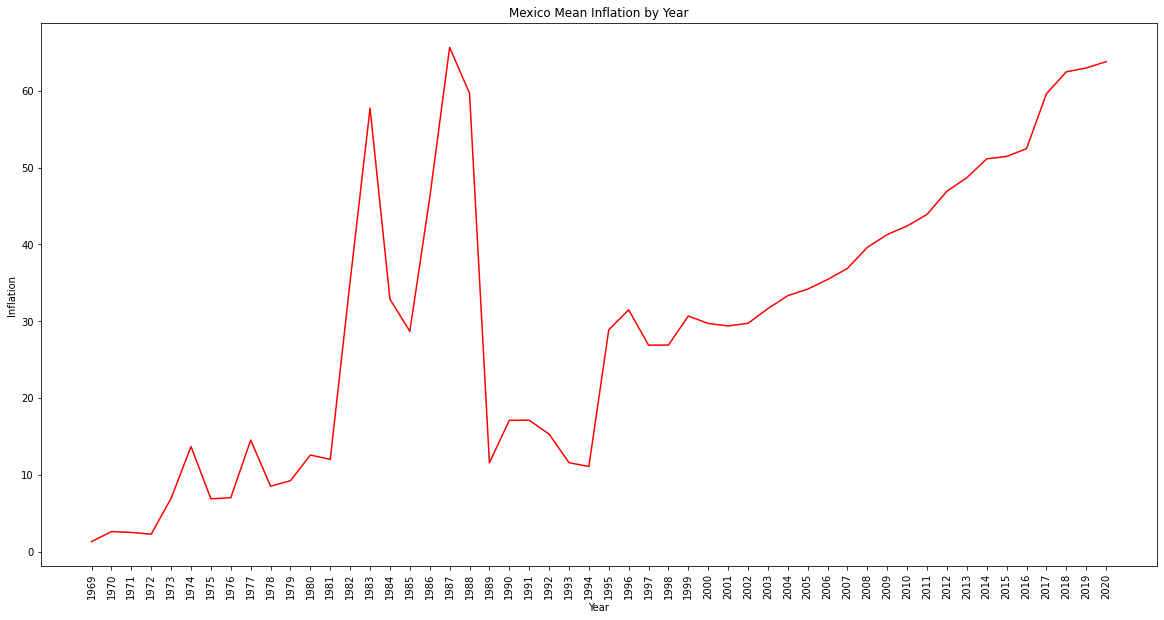

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud import storage
import matplotlib.pyplot as plt
import pandas as pd



# TODO(developer): Set key_path to the path to the service account key
#                  file.
key_path = "big-data-class2022-fddf30245965.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)
#storage_client = storage.Client(credentials=credentials, project=credentials.project_id,)
#print(storage_client)
# API request - fetch the dataset
#dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "inflation" dataset
dataset_ref = client.dataset("inflation", project="big-data-class2022")
print(dataset_ref)
# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)
#print(dataset)
#print(dataset.description)


# Download query results.
query_string = """
select Country, TIME_Code, Value  from `inflation.inflation` where Country = "Mexico" and Frequency = "Annual" and Time_code between "1962" and "2020"
"""

dataframe = (
    client.query(query_string)
    .result()
    .to_dataframe(
        # Optionally, explicitly request to use the BigQuery Storage API. As of
        # google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
        # API is used by default.
        
    )
)
print(dataframe.head())
print(dataframe.keys())
print(dataframe.shape)

# Create the result of the MEAN inflation Grouped By Year
result = dataframe.groupby("TIME_Code")["Value"].mean().to_frame()
print(result)
# Get the Labels to be used
labels = list(result.index)
print("RESULT" ,result.keys())
print(labels)
# Get the X values to make the plot
x = list(result.index)
# Get the Y values for the plot
y = result["Value"]

# Plotting a figure of width 15 and height 10
plt_1 = plt.figure(figsize=(20, 10))
plt.plot(x, y, color="r")
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.xticks(x, labels, rotation='vertical') 
#plt.margins(0.2)
plt.title("Mexico Mean Inflation by Year")
plt.show()



# Nueva sección

# Nueva sección